In [102]:
import json
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

In [103]:
# Step 1: Load the data from JSON
with open("adjectivesFEW.json", 'r') as json_file:
    data = json.load(json_file)

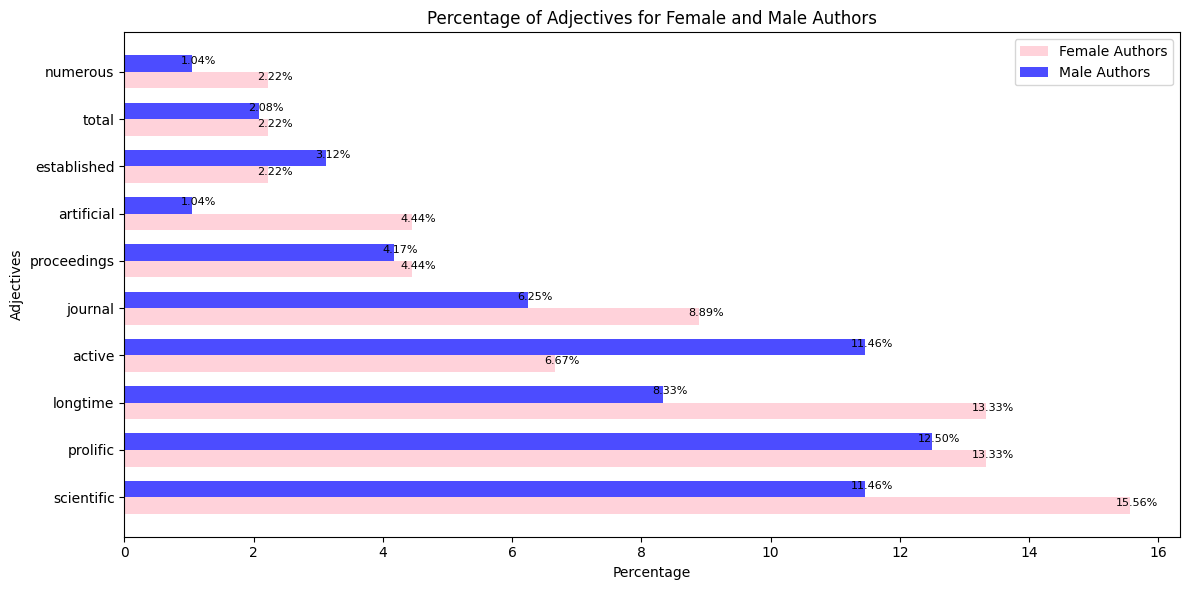

In [104]:
female_authors = ['Mary Jean Harrold', 'Catherine Plaisant', 'Mary C. Whitton', 'Anna Celler', 'Penny Rheingans', 'Marie desJardins', 'Carla E. Brodley']
male_authors = [author for author in data['adjectives_per_author'] if author not in female_authors]

# Step 3: Count the occurrences of each adjective for female authors
female_adjective_counts = {}

for female_author in female_authors:
    for adj, count in data['adjectives_per_author'][female_author].items():
        female_adjective_counts[adj] = female_adjective_counts.get(adj, 0) + count

# Step 4: Count the occurrences of each adjective for male authors
male_adjective_counts = {}

for male_author in male_authors:
    for adj, count in data['adjectives_per_author'][male_author].items():
        male_adjective_counts[adj] = male_adjective_counts.get(adj, 0) + count

# Calculate the total number of adjectives for female and male authors
total_female_adjectives = sum(female_adjective_counts.values())
total_male_adjectives = sum(male_adjective_counts.values())

# Calculate the percentage of each adjective for female and male authors
female_percentages = {adj: (count / total_female_adjectives) * 100 for adj, count in female_adjective_counts.items()}
male_percentages = {adj: (count / total_male_adjectives) * 100 for adj, count in male_adjective_counts.items()}

# Filter out adjectives not present in both female and male authors
common_adjectives = set(female_percentages.keys()) & set(male_percentages.keys())
female_percent_common = [female_percentages[adj] for adj in common_adjectives]
male_percent_common = [male_percentages[adj] for adj in common_adjectives]

# Select the top N most common adjectives
top_n = 15  # Change this value to display a different number of adjectives
sorted_common_adjectives = sorted(common_adjectives, key=lambda adj: female_percentages[adj] + male_percentages[adj], reverse=True)
selected_adjectives = sorted_common_adjectives[:top_n]

# Create the visualization
x = np.arange(len(selected_adjectives))
width = 0.35

plt.figure(figsize=(12, 6))
plt.barh(x, [female_percentages[adj] for adj in selected_adjectives], width, label='Female Authors', color='pink', alpha=0.7)
plt.barh(x + width, [male_percentages[adj] for adj in selected_adjectives], width, label='Male Authors', color='blue', alpha=0.7)

plt.ylabel('Adjectives')
plt.xlabel('Percentage')
plt.title('Percentage of Adjectives for Female and Male Authors')
plt.legend()
plt.yticks(x + width / 2, selected_adjectives, ha='right')

# Annotate each bar with its corresponding percentage value
for i in range(len(selected_adjectives)):
    plt.annotate(f'{female_percentages[selected_adjectives[i]]:.2f}%', (female_percentages[selected_adjectives[i]], x[i]), textcoords="offset points", xytext=(5,0), ha='center', fontsize=8)
    plt.annotate(f'{male_percentages[selected_adjectives[i]]:.2f}%', (male_percentages[selected_adjectives[i]], x[i] + width), textcoords="offset points", xytext=(5,0), ha='center', fontsize=8)

plt.tight_layout()
plt.tight_layout()

plt.show()

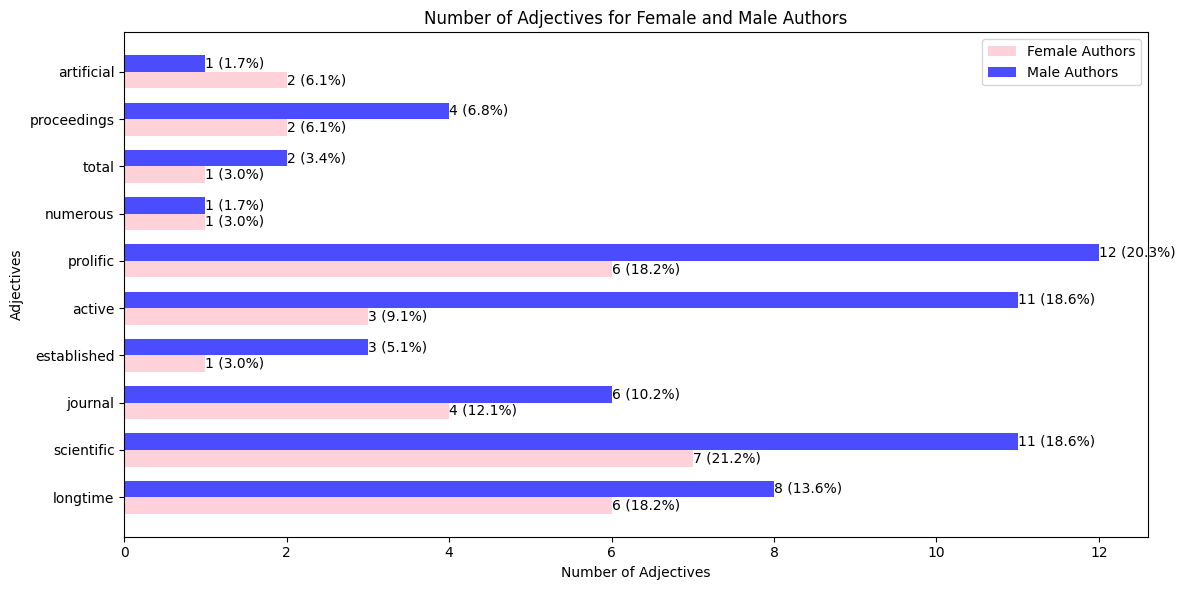

In [105]:
# Calculate the total counts for each set of adjectives (female and male)
total_female_counts = sum(female_adjective_counts[adj] for adj in common_adjectives)
total_male_counts = sum(male_adjective_counts[adj] for adj in common_adjectives)

plt.figure(figsize=(12, 6))
bars1 = plt.barh(x, [female_adjective_counts[adj] for adj in common_adjectives], width, label='Female Authors', color='pink', alpha=0.7)
bars2 = plt.barh(x + width, [male_adjective_counts[adj] for adj in common_adjectives], width, label='Male Authors', color='blue', alpha=0.7)

plt.ylabel('Adjectives')
plt.xlabel('Number of Adjectives')
plt.title('Number of Adjectives for Female and Male Authors')
plt.legend()
plt.yticks(x + width / 2, common_adjectives, ha='right')
plt.tick_params(axis='y', labelrotation=0)  # Rotate the y-axis tick labels

# Adding counts as text annotations inside the bars
for i, bar in enumerate(bars1):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()} ({bar.get_width() / total_female_counts * 100:.1f}%)', ha='left', va='center')

for i, bar in enumerate(bars2):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()} ({bar.get_width() / total_male_counts * 100:.1f}%)', ha='left', va='center')

plt.tight_layout()
plt.show()


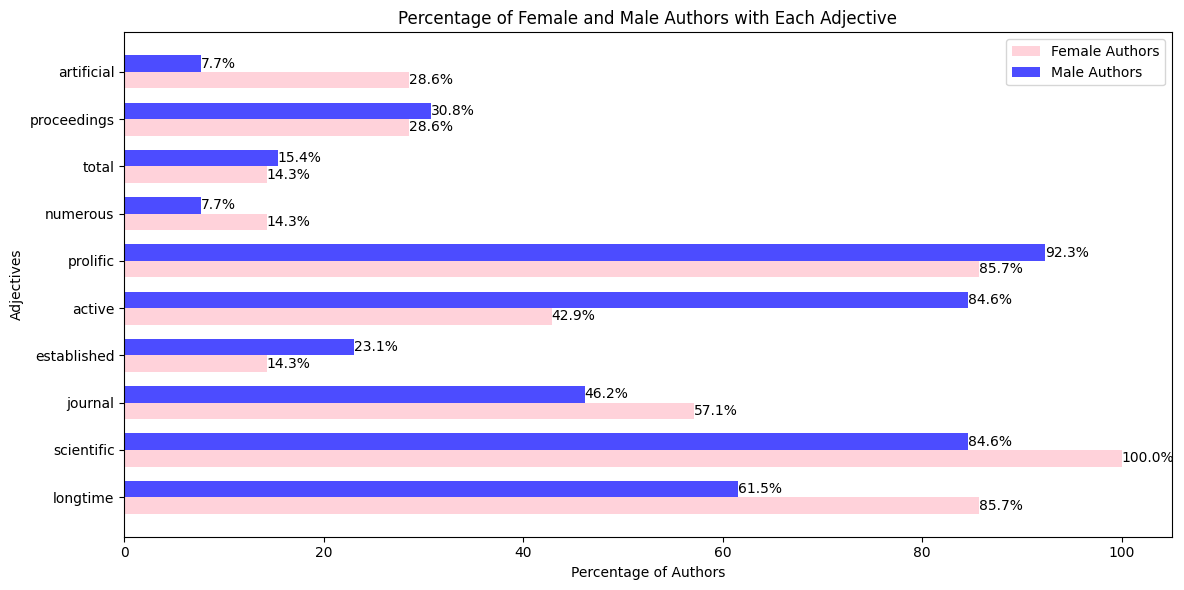

In [106]:
# Get the unique list of adjectives present in both female and male authors
common_adjectives = list(set(female_adjective_counts.keys()) & set(male_adjective_counts.keys()))

# Calculate the total count of female and male authors
total_female_authors = len(female_authors)
total_male_authors = len(male_authors)

# Calculate the percentages for each adjective
female_percentages = [female_adjective_counts[adj] / total_female_authors * 100 for adj in common_adjectives]
male_percentages = [male_adjective_counts[adj] / total_male_authors * 100 for adj in common_adjectives]

plt.figure(figsize=(12, 6))
bars1 = plt.barh(x, female_percentages, width, label='Female Authors', color='pink', alpha=0.7)
bars2 = plt.barh(x + width, male_percentages, width, label='Male Authors', color='blue', alpha=0.7)

plt.ylabel('Adjectives')
plt.xlabel('Percentage of Authors')
plt.title('Percentage of Female and Male Authors with Each Adjective')
plt.legend()
plt.yticks(x + width / 2, common_adjectives, ha='right')
plt.tick_params(axis='y', labelrotation=0)

# Adding percentage values for females as text annotations inside the bars
for i, bar in enumerate(bars1):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{female_percentages[i]:.1f}%", ha='left', va='center')

# Adding percentage values for males as text annotations inside the bars
for i, bar in enumerate(bars2):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{male_percentages[i]:.1f}%", ha='left', va='center')

plt.tight_layout()
plt.show()
